In [1]:
import os
import sys

import numpy as np
import warnings

#stderr = sys.stderr
#sys.stderr = open(os.devnull, 'w')
from keras import backend as K
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing import image
#sys.stderr = stderr

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# dimensions of our images
img_width, img_height = 50, 50
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

THRESHOLD = 0.95


class Predict:


    def __init__(self):
        # build model

        model = Sequential()
        model.add(Conv2D(32, (3, 3), input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(64))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1))
        model.add(Activation('sigmoid'))

        model.compile(loss='binary_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

        # load model
        model.load_weights(os.path.join(os.path.abspath(''), 'model', 'model.h5'))
        self.model = model

    def predict_img_class(self, img):
        result = self.model.predict(img)
        if result < THRESHOLD:
            classification = "ecell"
        else:
            classification = "non-ecell"
        return classification

    def predict_img_class_folder(self, path):
        classifications = {}

        for img in os.listdir(path):
            imgpath = path + "/" + img
            test_image = image.load_img(imgpath, target_size=(img_width, img_height))
            test_image = image.img_to_array(test_image)
            test_image = np.expand_dims(test_image, axis=0)
            result = self.model.predict(test_image)
            if result < THRESHOLD:
                classification = "ecell"

            else:
                classification = "non-ecell"

            classifications[img] = classification

        return classifications


    #image_list - the list of 50 by 50 pixel images as nd.arrays()
    # center list - list of tuples of int, the centers (x,y) of each image
    def filter_positive_classifications(self, image_list, center_list):
        ecell_center_list = []
        for i, img in enumerate(image_list):
            if img.shape != (50,50,3):
                continue
            test_image = img.astype(np.float32)
            test_image = np.expand_dims(test_image, axis=0)
            result = self.model.predict(test_image)
            if result < THRESHOLD:
                ecell_center_list.append(center_list[i])
        return ecell_center_list



Using TensorFlow backend.


In [2]:
print(os.path.abspath(''))

/Users/apple/Desktop/CurrentClass/Senior_Design/digital_pathology/digital-pathology-master/src/SlideAnalysis/src/py


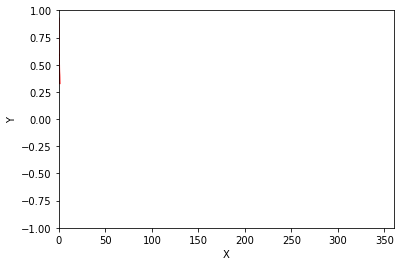

In [29]:
import matplotlib.pyplot as plt

def plt_dynamic(x, y, ax, colors):
    for color in colors:
        ax.plot(x, y, color)
    fig.canvas.draw()
    
    
if __name__ == '__main__':
    p = Predict()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('X') ; ax.set_ylabel('Y')
    ax.set_xlim(0,360) ; ax.set_ylim(-1,1)
    p_x = []
    r_x = []
    f_x = []
    total_precision = []
    total_recall = []
    total_f_measure = []
    for i in [x * 0.01 for x in range(1,100)]:
        THRESHOLD = i
        classes1 = p.predict_img_class_folder("/Users/apple/Desktop/CurrentClass/Senior_Design/digital_pathology/digital-pathology-master/src/SlideAnalysis/src/py/cellData/eosinophil")
        classes2 = p.predict_img_class_folder("/Users/apple/Desktop/CurrentClass/Senior_Design/digital_pathology/digital-pathology-master/src/SlideAnalysis/src/py/cellData/non-eosinophil")
        #print(classes)
        TP = len([k for k,v in classes1.items() if v == 'ecell'])
        FN = len([k for k,v in classes1.items() if v == 'non-ecell'])
        FP = len([k for k,v in classes2.items() if v == 'ecell'])
        TN = len([k for k,v in classes2.items() if v == 'non-ecell'])
        
        precision = None
        recall = None
        f_measure = None
        if TP+FP!=0:
            precision = TP/(TP+FP)
            total_precision.append(precision)
            p_x.append(i)
            
               
            
        if TP+FN !=0:
            recall = TP/(TP+FN)
            total_recall.append(recall)
            r_x.append(i)
            
                
        if precision!=None and recall != None:
            
            f_measure = (2*precision*recall)/(precision+recall)
            total_f_measure.append(f_measure)
            f_x.append(i)
            
        
       # total_precision.append(precision)
       # total_recall.append(recall)
       # total_f_measure.append(f_measure)

    #print(classes1
    
plt_dynamic(p_x, total_precision, ax,['r'])
#plt_dynamic(r_x, total_recall, ax,['g'])
#plt_dynamic(f_x, total_f_measure, ax,['b'])

<function matplotlib.pyplot.show(*args, **kw)>

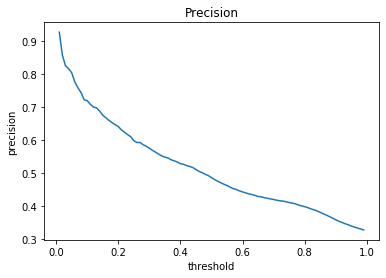

In [30]:

plt.plot(p_x, total_precision) 
plt.title('Precision')
plt.xlabel('threshold')
plt.ylabel('precision')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

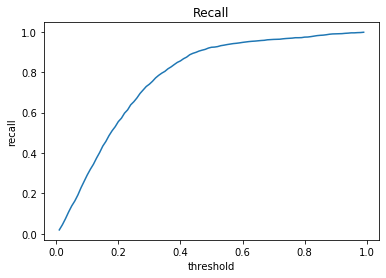

In [31]:
plt.plot(r_x, total_recall) 
plt.title('Recall')
plt.xlabel('threshold')
plt.ylabel('recall')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

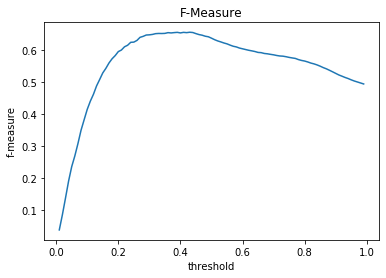

In [32]:
plt.plot(f_x, total_f_measure) 
plt.title('F-Measure')
plt.xlabel('threshold')
plt.ylabel('f-measure')
plt.show

In [12]:
total_precision

[0.926829268292683,
 0.7086527929901424,
 0.6311207834602829,
 0.5691449814126394,
 0.5269784172661871,
 0.4807692307692308,
 0.4403292181069959,
 0.41811175337186895,
 0.3956748097717261,
 0.3545085583200988]

In [14]:
total_f_measure

[0.03675048355899419,
 0.4401360544217687,
 0.6002587322121604,
 0.6491414034343862,
 0.6556032071601716,
 0.6326978235194871,
 0.6017809717231682,
 0.5831591519856674,
 0.5628827802307365,
 0.5222251104756954]

In [8]:
[x * 0.01 for x in range(1,100,10)]

[0.01, 0.11, 0.21, 0.31, 0.41000000000000003, 0.51, 0.61, 0.71, 0.81, 0.91]

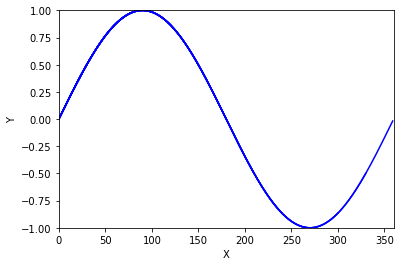

In [5]:
import matplotlib.pyplot as plt

import time

def plt_dynamic(x, y, ax, colors=['b']):
    for color in colors:
        ax.plot(x, y, color)
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X') ; ax.set_ylabel('Y')
ax.set_xlim(0,360) ; ax.set_ylim(-1,1)
xs, ys = [], []

# this is any loop for which you want to plot dynamic updates.
# in my case, I'm plotting loss functions for neural nets
for x in range(360):
    y = np.sin(x*np.pi/180)
    xs.append(x)
    ys.append(y)
    if x % 30 == 0:
        plt_dynamic(xs, ys, ax)
        time.sleep(.2)
plt_dynamic(xs, ys, ax)